In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from src.data.partglot_data import PartGlotData
from src.helper.visualization import visualize_meshes, visualize_pointclouds_parts
import matplotlib.pyplot as plt
import numpy as np
import k3d

In [42]:
data = PartGlotData(["a tiger back", "a rainbow seat", "zebra leg", "nightsky arm"])

In [43]:
out = data[21]

Using part names: ['back', 'seat', 'leg', 'arm']
PartSegmenter initialized with
- sseg_count: 25
- partglot_data_dir: /mnt/hdd/PartGlotData
- partglot_model_path: /mnt/hdd/PartGlotData/pn_aware.ckpt

Starting to run...

Running point cloud stats with use_bsp_ssegs_gt=True
- unique point percentage: 9.7%
- unique point percentage (non-zeros): 25.6%

Successfully ran part segmentation with use_sseg_gt=True

back (18431, 3) (912, 3)
seat (2047, 3) (971, 3)
leg (4095, 3) (420, 3)
arm (1023, 3) (188, 3)


In [44]:
weights = out["weights"]["nightsky arm"]

In [45]:
plot = k3d.plot(grid_visible=False, grid=(-0.55, -0.55, -0.55, 0.55, 0.55, 0.55))
vertices = out["mesh"].vertices.cpu().numpy().astype(np.float32)
faces = out["mesh"].faces.cpu().numpy().astype(np.uint32)
plt_points = k3d.mesh(vertices, faces, color=0xff0000,point_size=0.025, attribute=list(weights[:,0]))
#plt_points = k3d.points(vertices, color=0xff0000,point_size=0.025, opacities=list(weights[:,0]))
plot += plt_points
plt_points.shader = '3d'
plot.display()

Output()

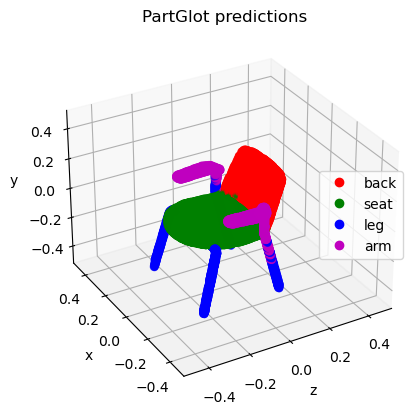

In [5]:
PartGlotData.visualize_predicted_maps(out["mesh"].vertices.cpu().numpy(), out["labels"], "./masks.png")

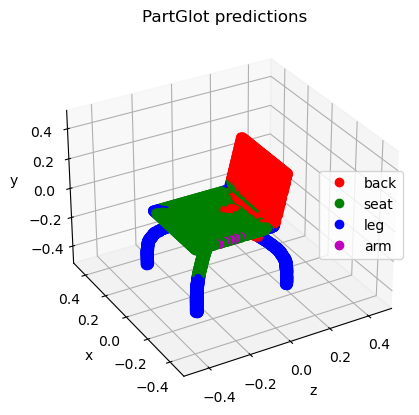

In [13]:
PartGlotData.visualize_predicted_maps(out["mesh"].vertices.cpu().numpy(), out["labels"], "./masks.png")

In [11]:
visualize_pointclouds_parts([out["mesh"].vertices.cpu().numpy()], [out["labels"]])

Output()

In [73]:
rev_label_mapping = {0:"back", 1:"seat", 2:"leg", 3:"arm"}

In [76]:
np.sort(np.unique(out["labels"]))

array([0, 1, 2, 3])

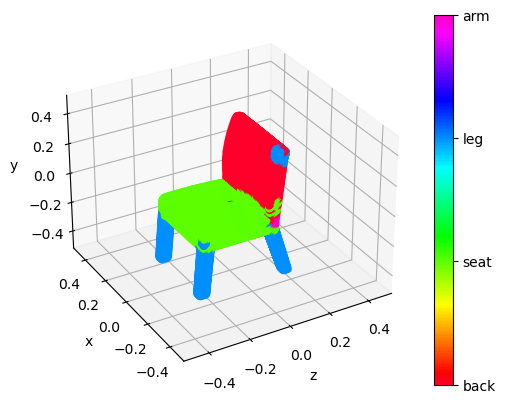

In [77]:
points = out["mesh"].vertices.cpu().numpy()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sp = ax.scatter(points[:,0], points[:,1], points[:,2],c=out["labels"],cmap="gist_rainbow")
cbar = plt.colorbar(sp, ticks=np.unique(out["labels"]))
cbar.ax.set_yticklabels([rev_label_mapping[key] for key in np.sort(np.unique(out["labels"]))])
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=30,azim=-120, vertical_axis="y")

In [9]:
(out['masks']['tiger seat']==0).all()

tensor(False)

In [7]:
out.keys()

dict_keys(['name', 'mesh', 'masks', 'weights', 'sigmas', 'coms'])

In [6]:
(out['masks']['rainbow legs']==1).all()

tensor(False)

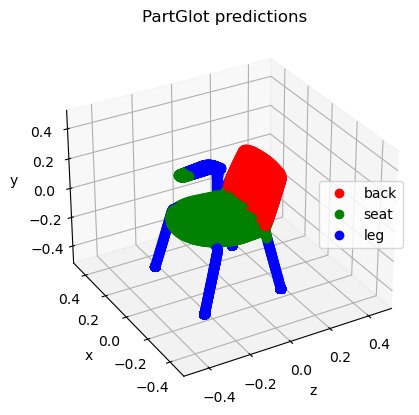

In [6]:
PartGlotData.visualize_predicted_maps(out["mesh"].vertices.cpu().numpy(), out["labels"], "./masks.png")

In [15]:
"leg" in ["leg in", "bla arm"]

False

In [16]:
"leg" in "leg in"

True